In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re
tf.__version__

'2.7.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# attempt to use .getfile from gdrive failed
tf.keras.utils.get_file("/content/nlp-getting-started.zip",
                        origin="https://drive.google.com/file/d/14WZzI5YA_q0LAoNnQ5zDuARyqgWK4G3x",
                        extract=True,
                        cache_subdir="/content")

  16384/Unknown - 0s 0us/step

'/content/nlp-getting-started.zip'

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning_PROJET/sample_submission.csv", error_bad_lines=False, encoding="utf-8")
dataset.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
dataset_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning_PROJET/train.csv", error_bad_lines=False, encoding="utf-8")
dataset_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [6]:
dataset_train.shape

(7613, 5)

In [7]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning_PROJET/test.csv", error_bad_lines=False, encoding="utf-8")
dataset_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
dataset_test.shape

(3263, 4)

In [9]:
dataset_train.groupby("text").sum().sort_values("target", ascending=False)

,id,target
text,,
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,51405,10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,54662,6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,17599,5
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...,32672,4
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM,32301,3
...,...,...
Edwin wow. Crushed.,2715,0
Ebay Snipe RT? http://t.co/SlQnph34Nt Lego Power Miners Set 8960 Thunder Driller Boxed. ?Please Favorite &amp; Share,9581,0
Eating takis then rubbing my eyes with my hands now my eyes are bleeding tears,1042,0


In [10]:
dataset_test.groupby("location").sum().sort_values(["location"], ascending=False)

,id
location,
å©hicago,8273
"ÌÏT: 7.384559,3.8793718",8174
"ÌÏT: 58.193556,-5.334943",7181
"ÌÏT: 50.953278,-113.978785",8145
"ÌÏT: 41.373061,-71.942237",1794
...,...
?becky?chloe?,9274
Manchester/Nantwich,4409
Waiheke Island,1281


In [11]:
dataset_train.isnull().sum().sort_values(ascending = False).head(20)

location    2533
keyword       61
target         0
text           0
id             0
dtype: int64

In [12]:
dataset_test.isnull().sum().sort_values(ascending = False).head(20)

location    1105
keyword       26
text           0
id             0
dtype: int64

In [13]:
# dataset_train[dataset_train["location"]!="NaN"]

In [14]:
dataset_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


In [15]:
#test2 = test.str.split(" http")

dataset_train["text"] = dataset_train["text"].str.replace(" http","|")


In [16]:
dataset_train['text_cleaned'], dataset_train['links'] = dataset_train['text'].str.split('|', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [17]:
dataset_train

,id,keyword,location,text,target,text_cleaned,links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"13,000 people receive #wildfires evacuation orders in California",NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,NaN
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes|://t.co/STfMbbZFB5,1,Two giant cranes holding a bridge collapse into nearby homes,://t.co/STfMbbZFB5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,NaN
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.|://t.co/zDtoyd8EbJ,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,://t.co/zDtoyd8EbJ
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,NaN


In [18]:
# dataset_train["text2"].start[r"([@])\w+"]

In [19]:
# ([@])\w+
# dataset_train["text4"] = dataset_train[text_cleaned]

In [20]:
index_with_nan = dataset_train.index[dataset_train.isnull().any(axis=1)]
index_with_nan.shape
dataset_train.drop(index_with_nan,0, inplace=True)
dataset_train.shape



(2652, 7)

In [21]:
index_with_nan = dataset_test.index[dataset_test.isnull().any(axis=1)]
index_with_nan.shape
dataset_test.drop(index_with_nan,0, inplace=True)
dataset_test.shape

(2158, 4)

In [22]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 2.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [23]:
import en_core_web_sm
nlp = en_core_web_sm.load()


In [24]:
from spacy.lang.en.stop_words import STOP_WORDS

In [25]:
dataset_train["text_clean_2"] = dataset_train["text_cleaned"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))



In [26]:
dataset_train["text_clean_2"] = dataset_train["text_clean_2"].apply(lambda x: x.replace(" +"," ").lower().strip())
dataset_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale markets ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,we always try to bring the heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze breaking newsnigeria flag set ablaze in aba
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,on plus side look at the sky last night it was ablaze
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office in abia set ablaze
...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,had an awesome time gettin wrecked at bowling last night
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 words that wrecked dis stock
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,on the bright side i wrecked
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer igers 3 words that wrecked disneys stock


In [27]:
dataset_train["text_clean_2"] = dataset_train["text_clean_2"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))
dataset_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,try bring heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze break newsnigeria flag set ablaze aba
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,plus look sky night ablaze
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office abia set ablaze
...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,awesome time gettin wreck bowl night
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 word wreck dis stock
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,bright wreck
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer iger 3 word wreck disney stock


In [28]:
test = dataset_train["text_clean_2"]

In [29]:
test[test.str.contains(" @")].count()

0

In [30]:
test

31                                         bbcmtd wholesale market ablaze
32                                               try bring heavy metal rt
33                      africanbaze break newsnigeria flag set ablaze aba
35                                             plus look sky night ablaze
37                                            inec office abia set ablaze
                                      ...                                
7573                                 awesome time gettin wreck bowl night
7574                                        cramer 3 word wreck dis stock
7575                                                         bright wreck
7580               fx forex trading cramer iger 3 word wreck disney stock
7581    engineshe great atmosphere british lion gig tonight hearing wreck
Name: text_clean_2, Length: 2652, dtype: object

In [31]:
# dataset_train["text2"]
dataset_train["text_clean_2"]

31                                         bbcmtd wholesale market ablaze
32                                               try bring heavy metal rt
33                      africanbaze break newsnigeria flag set ablaze aba
35                                             plus look sky night ablaze
37                                            inec office abia set ablaze
                                      ...                                
7573                                 awesome time gettin wreck bowl night
7574                                        cramer 3 word wreck dis stock
7575                                                         bright wreck
7580               fx forex trading cramer iger 3 word wreck disney stock
7581    engineshe great atmosphere british lion gig tonight hearing wreck
Name: text_clean_2, Length: 2652, dtype: object

In [32]:
# test2


In [33]:
# dataset_train["text_clean_3"] = dataset_train["text_clean_2"].str.split("|")

In [34]:
dataset_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,try bring heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze break newsnigeria flag set ablaze aba
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,plus look sky night ablaze
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office abia set ablaze
...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,awesome time gettin wreck bowl night
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 word wreck dis stock
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,bright wreck
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer iger 3 word wreck disney stock


In [35]:
dataset_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,try bring heavy metal rt
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze break newsnigeria flag set ablaze aba
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,plus look sky night ablaze
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office abia set ablaze
...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,awesome time gettin wreck bowl night
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 word wreck dis stock
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,bright wreck
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer iger 3 word wreck disney stock


In [36]:
# test3 = test2.apply(lambda x: re.sub("\B@\w+","",x))
# test3
# test4 = test3.apply(lambda x: re.sub("\B@\w+","",x))

In [37]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)

In [38]:
tokenizer.fit_on_texts(dataset_train["text_clean_2"])

In [39]:
tokenizer.word_index

{'fire': 1,
 'new': 2,
 'video': 3,
 'kill': 4,
 'family': 5,
 'emergency': 6,
 'amp': 7,
 'police': 8,
 'like': 9,
 'crash': 10,
 'attack': 11,
 'news': 12,
 'flood': 13,
 'bomb': 14,
 'california': 15,
 'disaster': 16,
 '2': 17,
 'suicide': 18,
 'people': 19,
 's': 20,
 'watch': 21,
 'body': 22,
 'plan': 23,
 'home': 24,
 'storm': 25,
 'rt': 26,
 'work': 27,
 'man': 28,
 'service': 29,
 'year': 30,
 'burn': 31,
 'photo': 32,
 'rescue': 33,
 'legionnaire': 34,
 'hiroshima': 35,
 'collapse': 36,
 'mh370': 37,
 'read': 38,
 'youtube': 39,
 'train': 40,
 'accident': 41,
 'woman': 42,
 'confirm': 43,
 'death': 44,
 '2015': 45,
 'wave': 46,
 'day': 47,
 'nuclear': 48,
 'quarantine': 49,
 'wildfire': 50,
 'hot': 51,
 'find': 52,
 'fear': 53,
 'content': 54,
 'reddit': 55,
 'cause': 56,
 'detonate': 57,
 'look': 58,
 'come': 59,
 'pm': 60,
 'fatal': 61,
 'world': 62,
 'suspect': 63,
 'help': 64,
 'old': 65,
 'bag': 66,
 'dead': 67,
 '5': 68,
 'issue': 69,
 'obama': 70,
 '4': 71,
 'oil': 72,


In [40]:
tokenizer.word_counts

OrderedDict([('bbcmtd', 1),
             ('wholesale', 3),
             ('market', 24),
             ('ablaze', 14),
             ('try', 16),
             ('bring', 8),
             ('heavy', 13),
             ('metal', 7),
             ('rt', 46),
             ('africanbaze', 1),
             ('break', 17),
             ('newsnigeria', 1),
             ('flag', 16),
             ('set', 25),
             ('aba', 11),
             ('plus', 3),
             ('look', 33),
             ('sky', 7),
             ('night', 10),
             ('inec', 2),
             ('office', 6),
             ('abia', 2),
             ('check', 24),
             ('west', 13),
             ('burn', 44),
             ('thousand', 13),
             ('wildfire', 36),
             ('california', 55),
             ('deputies', 1),
             ('man', 45),
             ('shoot', 15),
             ('brighton', 2),
             ('home', 48),
             ('santa', 4),
             ('cruz', 4),
             ('ûó', 

In [41]:
word_list = tokenizer.word_counts
word_list.items()

odict_items([('bbcmtd', 1), ('wholesale', 3), ('market', 24), ('ablaze', 14), ('try', 16), ('bring', 8), ('heavy', 13), ('metal', 7), ('rt', 46), ('africanbaze', 1), ('break', 17), ('newsnigeria', 1), ('flag', 16), ('set', 25), ('aba', 11), ('plus', 3), ('look', 33), ('sky', 7), ('night', 10), ('inec', 2), ('office', 6), ('abia', 2), ('check', 24), ('west', 13), ('burn', 44), ('thousand', 13), ('wildfire', 36), ('california', 55), ('deputies', 1), ('man', 45), ('shoot', 15), ('brighton', 2), ('home', 48), ('santa', 4), ('cruz', 4), ('ûó', 15), ('head', 12), ('st', 14), ('elizabeth', 1), ('police', 70), ('superintendent', 1), ('lanford', 1), ('salmon', 2), ('r', 5), ('arsonist', 13), ('deliberately', 1), ('black', 26), ('church', 1), ('north', 12), ('carolinaåêablaze', 1), ('noche', 1), ('elbestia', 1), ('alexissanchez', 1), ('happy', 7), ('teammate', 1), ('train', 38), ('hard', 1), ('goodnight', 1), ('gunner', 1), ('kurds', 1), ('trample', 1), ('turkmen', 2), ('later', 6), ('vandalize'

In [42]:
df_word_list = pd.DataFrame(word_list.items())

In [43]:
df_word_list.sort_values(by=1, ascending=False)

,0,1
105,fire,129
263,new,129
577,video,89
164,kill,85
946,family,82
...,...,...
3142,thorium,1
3144,scandal,1
3146,httptcogxgm1t3w0j,1
3147,elation,1


In [44]:
dataset_train["text_clean_3"] = tokenizer.texts_to_sequences(dataset_train.text_clean_2)

In [45]:
dataset_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2,text_clean_3
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale market ablaze,"[122, 289]"
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,try bring heavy metal rt,"[233, 570, 318, 639, 26]"
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze break newsnigeria flag set ablaze aba,"[208, 234, 110, 289, 405]"
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,plus look sky night ablaze,"[58, 640, 458, 289]"
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office abia set ablaze,"[752, 110, 289]"
...,...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,awesome time gettin wreck bowl night,"[77, 189, 458]"
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 word wreck dis stock,"[84, 437, 189, 109]"
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,bright wreck,[189]
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer iger 3 word wreck disney stock,"[84, 437, 189, 707, 109]"


In [46]:
dataset_train["len_review"] = dataset_train["text_clean_3"].apply(lambda x: len(x))

In [47]:

df_train = dataset_train[dataset_train["len_review"]!=0]

In [48]:
df_train

,id,keyword,location,text,target,text_cleaned,links,text_clean_2,text_clean_3,len_review
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze|://t.co/lHYXEOHY6C,1,@bbcmtd Wholesale Markets ablaze,://t.co/lHYXEOHY6C,bbcmtd wholesale market ablaze,"[122, 289]",2
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT|://t.co/YAo1e0xngw,0,We always try to bring the heavy. #metal #RT,://t.co/YAo1e0xngw,try bring heavy metal rt,"[233, 570, 318, 639, 26]",5
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.|://t.co/2nndBGwyEi,1,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,://t.co/2nndBGwyEi,africanbaze break newsnigeria flag set ablaze aba,"[208, 234, 110, 289, 405]",5
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE|://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,://t.co/qqsmshaJ3N,plus look sky night ablaze,"[58, 640, 458, 289]",4
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -|://t.co/3ImaomknnA,1,INEC Office in Abia Set Ablaze -,://t.co/3ImaomknnA,inec office abia set ablaze,"[752, 110, 289]",3
...,...,...,...,...,...,...,...,...,...,...
7573,10824,wrecked,"Denton, Texas",Had an awesome time gettin wrecked at bowling last night!|://t.co/Da9lZtOn1c,0,Had an awesome time gettin wrecked at bowling last night!,://t.co/Da9lZtOn1c,awesome time gettin wreck bowl night,"[77, 189, 458]",3
7574,10825,wrecked,Global,Cramer: 3 words that wrecked DIS stock -|://t.co/ud7XObYUa1,0,Cramer: 3 words that wrecked DIS stock -,://t.co/ud7XObYUa1,cramer 3 word wreck dis stock,"[84, 437, 189, 109]",4
7575,10826,wrecked,TN,On the bright side I wrecked|://t.co/uEa0txRHYs,0,On the bright side I wrecked,://t.co/uEa0txRHYs,bright wreck,[189],1
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock|://t.co/7enNulLKzM,0,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock,://t.co/7enNulLKzM,fx forex trading cramer iger 3 word wreck disney stock,"[84, 437, 189, 707, 109]",5


In [49]:
text_padded = tf.keras.preprocessing.sequence.pad_sequences(df_train.text_clean_3, padding="post")

In [50]:
text_padded

array([[122, 289,   0, ...,   0,   0,   0],
       [233, 570, 318, ...,   0,   0,   0],
       [208, 234, 110, ...,   0,   0,   0],
       ...,
       [189,   0,   0, ...,   0,   0,   0],
       [ 84, 437, 189, ...,   0,   0,   0],
       [254, 700, 544, ...,   0,   0,   0]], dtype=int32)

In [51]:
df_train.target.values

array([1, 0, 1, ..., 0, 0, 0])

In [97]:
full_df = tf.data.Dataset.from_tensor_slices((text_padded, df_train.target.values))

In [98]:
vocab_size = tokenizer.num_words
vocab_size

1000

In [99]:
# Train Test Split
TAKE_SIZE = int(0.7*df_train.shape[0])

In [100]:
TAKE_SIZE

1831

In [101]:
train_data = full_df.take(TAKE_SIZE).shuffle(TAKE_SIZE)


In [102]:
train_data = train_data.batch(64)

In [103]:
test_data = full_df.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [104]:
# Look a batch 
for tweet, target in train_data.take(1):
  print(tweet, target)

tf.Tensor(
[[658 984 830 ...   0   0   0]
 [212  11   8 ...   0   0   0]
 [ 45 259 106 ...   0   0   0]
 ...
 [ 31  89 388 ...   0   0   0]
 [259 340 151 ...   0   0   0]
 [196 169 334 ...   0   0   0]], shape=(64, 16), dtype=int32) tf.Tensor(
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1], shape=(64,), dtype=int64)


### Model

In [146]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Dropout

vocab_size = len(tokenizer.word_index)
model_RegularSimpleRNN = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  SimpleRNN(units=64, return_sequences=True),
                  SimpleRNN(units=32, return_sequences=False),
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  Dense(1, activation="sigmoid")
])

In [147]:
model_RegularSimpleRNN.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 64)            421312    
                                                                 
 simple_rnn_40 (SimpleRNN)   (None, 16, 64)            8256      
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 8)                 136       
                                                                 
 dense_61 (Dense)            (None, 1)                 9         
                                                                 
Total params: 433,345
Trainable params: 433,345
Non-t

In [148]:
optimizer= tf.keras.optimizers.Adam()

model_RegularSimpleRNN.compile(optimizer=optimizer,
                        loss=tf.keras.losses.BinaryCrossentropy(),
                        metrics=[tf.keras.metrics.BinaryAccuracy()])

In [149]:
history_RegularSimpleRNN = model_RegularSimpleRNN.fit(train_data, epochs=10,validation_data = test_data)

Epoch 1/10
29/29 [==============================] - 3s 29ms/step - loss: 0.6631 - binary_accuracy: 0.6221 - val_loss: 0.6212 - val_binary_accuracy: 0.6985
Epoch 2/10
29/29 [==============================] - 1s 17ms/step - loss: 0.5084 - binary_accuracy: 0.7870 - val_loss: 0.6055 - val_binary_accuracy: 0.6641
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 0.3505 - binary_accuracy: 0.8733 - val_loss: 0.6778 - val_binary_accuracy: 0.6883
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.2632 - binary_accuracy: 0.9072 - val_loss: 0.7521 - val_binary_accuracy: 0.6896
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.2181 - binary_accuracy: 0.9148 - val_loss: 0.7968 - val_binary_accuracy: 0.6730
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.1760 - binary_accuracy: 0.9394 - val_loss: 0.8515 - val_binary_accuracy: 0.6845
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - los

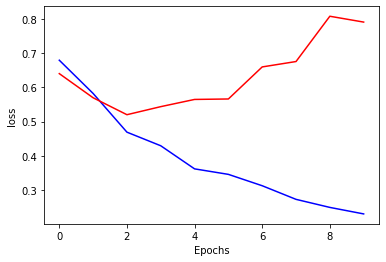

In [150]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

### Attempt to add dropout layers to fight overfitting

In [185]:
model_DropOut = tf.keras.Sequential([
                  Embedding(vocab_size+1, 128, input_shape=[tweet.shape[1],],name="embedding"),
                  SimpleRNN(units=64, return_sequences=True),
                  SimpleRNN(units=32, return_sequences=False),
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  Dropout(0.5),
                  Dense(1, activation="sigmoid")
])

In [186]:
model_DropOut.compile(optimizer=optimizer,
                        loss=tf.keras.losses.BinaryCrossentropy(),
                        metrics=[tf.keras.metrics.BinaryAccuracy()])

In [187]:
history_model_DropOut = model_RegularSimpleRNN.fit(train_data, epochs=10,validation_data = test_data)

Epoch 1/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0509 - binary_accuracy: 0.9754 - val_loss: 1.6549 - val_binary_accuracy: 0.6959
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0506 - binary_accuracy: 0.9743 - val_loss: 1.6869 - val_binary_accuracy: 0.6896
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0508 - binary_accuracy: 0.9749 - val_loss: 1.6719 - val_binary_accuracy: 0.6896
Epoch 4/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0517 - binary_accuracy: 0.9721 - val_loss: 1.7095 - val_binary_accuracy: 0.6832
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0530 - binary_accuracy: 0.9732 - val_loss: 1.6454 - val_binary_accuracy: 0.6819
Epoch 6/10
29/29 [==============================] - 1s 17ms/step - loss: 0.0532 - binary_accuracy: 0.9721 - val_loss: 1.5361 - val_binary_accuracy: 0.6908
Epoch 7/10
29/29 [==============================] - 1s 18ms/step - los

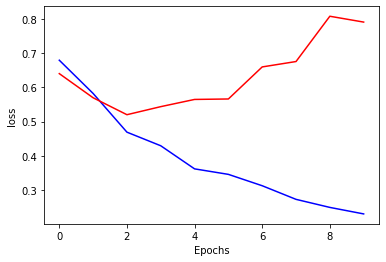

In [188]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

### Conclusion : adding dropout layers is unsuccesfull. Solutions would be to increase dataset records.

# GRU model test

In [232]:

model_gru = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  GRU(units=32, return_sequences=True),
                  Dropout(0.5),
                  GRU(units=16, return_sequences=False),
                  Dropout(0.3),
                  Dense(16, activation='relu'),
                  Dropout(0.3),
                  Dense(8, activation='relu'),
                  Dense(1, activation="sigmoid")
])

In [233]:
model_gru.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 64)            421312    
                                                                 
 gru_20 (GRU)                (None, 16, 32)            9408      
                                                                 
 dropout_42 (Dropout)        (None, 16, 32)            0         
                                                                 
 gru_21 (GRU)                (None, 16)                2400      
                                                                 
 dropout_43 (Dropout)        (None, 16)                0         
                                                                 
 dense_128 (Dense)           (None, 16)                272       
                                                                 
 dropout_44 (Dropout)        (None, 16)              

In [234]:
model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [235]:
history_GRU = model_gru.fit(train_data,
              epochs=20, 
              validation_data=test_data)

Epoch 1/20
29/29 [==============================] - 6s 55ms/step - loss: 0.6940 - binary_accuracy: 0.5101 - val_loss: 0.6887 - val_binary_accuracy: 0.5852
Epoch 2/20
29/29 [==============================] - 1s 27ms/step - loss: 0.6913 - binary_accuracy: 0.5238 - val_loss: 0.6717 - val_binary_accuracy: 0.5852
Epoch 3/20
29/29 [==============================] - 1s 27ms/step - loss: 0.5333 - binary_accuracy: 0.7504 - val_loss: 0.4954 - val_binary_accuracy: 0.7519
Epoch 4/20
29/29 [==============================] - 1s 26ms/step - loss: 0.4200 - binary_accuracy: 0.8525 - val_loss: 0.5302 - val_binary_accuracy: 0.7341
Epoch 5/20
29/29 [==============================] - 1s 26ms/step - loss: 0.3610 - binary_accuracy: 0.8793 - val_loss: 0.5304 - val_binary_accuracy: 0.7506
Epoch 6/20
29/29 [==============================] - 1s 27ms/step - loss: 0.3169 - binary_accuracy: 0.9001 - val_loss: 0.5393 - val_binary_accuracy: 0.7430
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - los

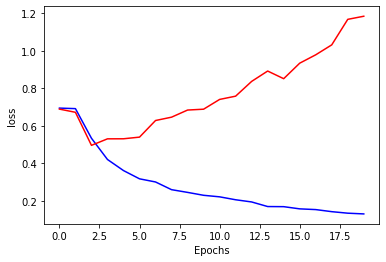

In [236]:
plt.plot(history_GRU.history["loss"], color="b")
plt.plot(history_GRU.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

### Conclusion : overfitting remains quite high even having done multiple try reducing model complexity or adding dropout layers.

# LSTM model test

In [244]:
model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  LSTM(units=64, return_sequences=True),
                  LSTM(units=32, return_sequences=False),
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),
                  Dense(1, activation="sigmoid")
])

In [245]:
model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [246]:
history_LSTM = model_lstm.fit(train_data,
              epochs=20, 
              validation_data=test_data)

Epoch 1/20
29/29 [==============================] - 6s 63ms/step - loss: 0.6555 - binary_accuracy: 0.6303 - val_loss: 0.6519 - val_binary_accuracy: 0.6438
Epoch 2/20
29/29 [==============================] - 1s 33ms/step - loss: 0.5291 - binary_accuracy: 0.7788 - val_loss: 0.5728 - val_binary_accuracy: 0.7354
Epoch 3/20
29/29 [==============================] - 1s 33ms/step - loss: 0.4613 - binary_accuracy: 0.8247 - val_loss: 0.5765 - val_binary_accuracy: 0.7303
Epoch 4/20
29/29 [==============================] - 1s 33ms/step - loss: 0.4060 - binary_accuracy: 0.8525 - val_loss: 0.5553 - val_binary_accuracy: 0.7023
Epoch 5/20
29/29 [==============================] - 1s 33ms/step - loss: 0.3730 - binary_accuracy: 0.8635 - val_loss: 0.6018 - val_binary_accuracy: 0.7176
Epoch 6/20
29/29 [==============================] - 1s 33ms/step - loss: 0.3357 - binary_accuracy: 0.8727 - val_loss: 0.5833 - val_binary_accuracy: 0.7252
Epoch 7/20
29/29 [==============================] - 1s 33ms/step - los

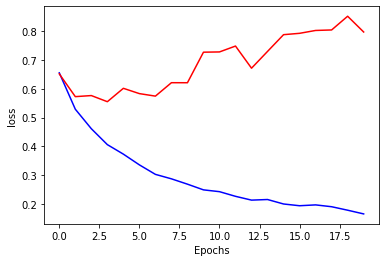

In [247]:
plt.plot(history_LSTM.history["loss"], color="b")
plt.plot(history_LSTM.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()